The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/Users/chris/Desktop/group-work/analysis/wiki_time_plots_modified.py:203: RuntimeWarning: divide by zero encountered in scalar divide
  change = (end_val - start_val) / start_val * 100


Plot saved to Greta Thunberg_words_occurrences_ma.png


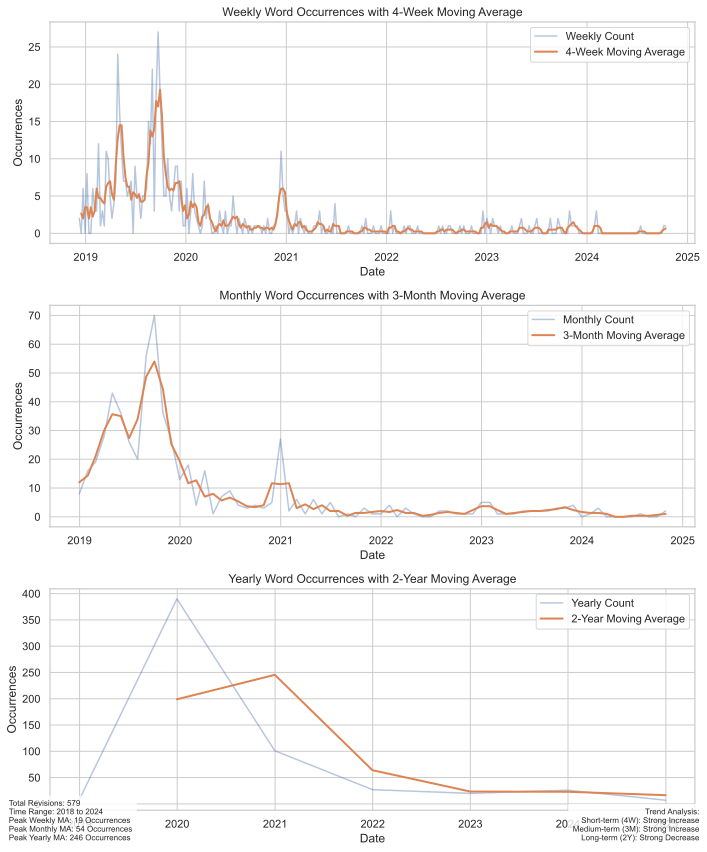

In [26]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
%config InlineBackend.figure_format = 'svg'

# Load the extension
%load_ext autoreload
%autoreload 2

# Import the module
import wiki_time_plots_modified as wtp

# Load some data
greta_df = wtp.load_wiki_data('../oii-fsds-wikipedia-main/DataFrames/Greta Thunberg.feather')

# You can also modify the style if needed
wtp.set_plot_style()  # Apply the custom style to all subsequent plots

# Create a plot with moving averages
fig_ma = wtp.plot_revision_counts(
    df=greta_df,
    article_name="Greta Thunberg",
    words=['revert', 'undid', 'undo'],
    output_dir='./',
    moving_average=True
)



/Users/chris/Desktop/group-work/analysis/wiki_time_plots_modified.py:203: RuntimeWarning: divide by zero encountered in scalar divide
  change = (end_val - start_val) / start_val * 100


Plot saved to Naomi Klein_words_occurrences_ma.png


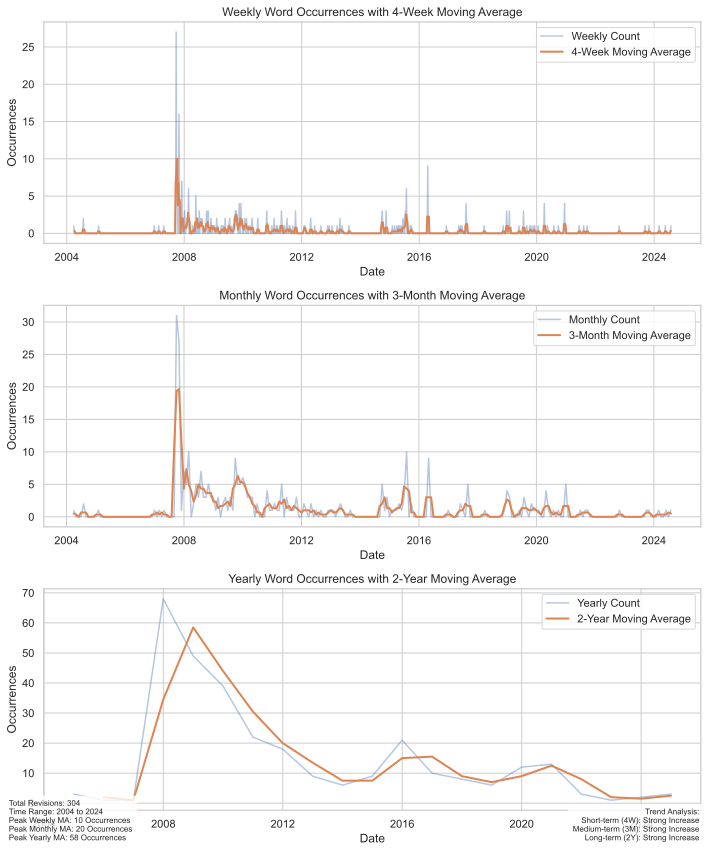

In [27]:
naomi_df = wtp.load_wiki_data('../oii-fsds-wikipedia-main/DataFrames/Naomi Klein.feather')

# You can also modify the style if needed
wtp.set_plot_style()  # Apply the custom style to all subsequent plots

# Create a plot with moving averages
fig_ma = wtp.plot_revision_counts(
    df=naomi_df,
    article_name="Naomi Klein",
    words=['revert', 'undid', 'undo'],
    output_dir='./',
    moving_average=True
)

Plot saved to word_occurrence_comparison.png


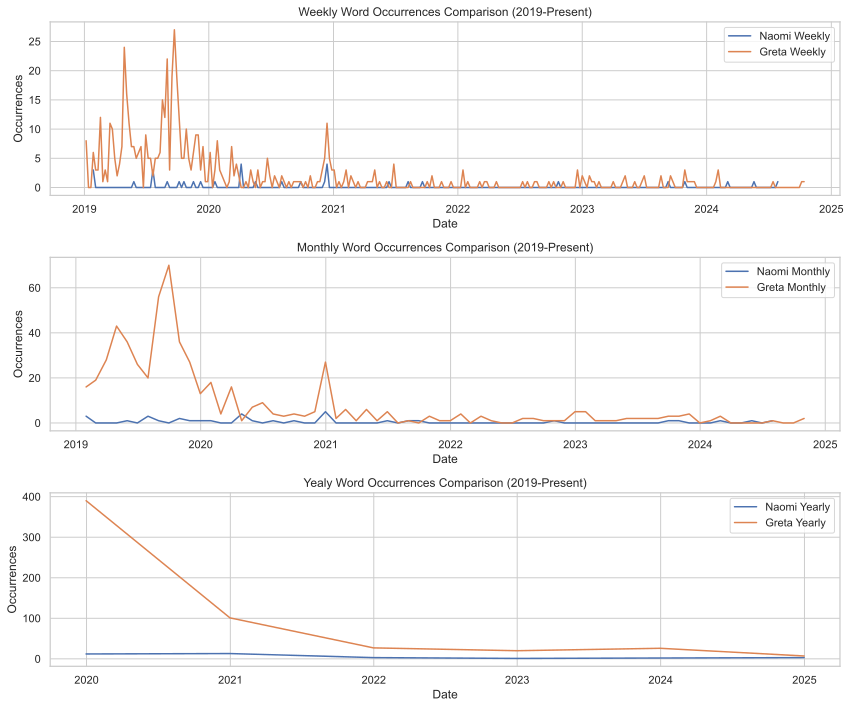

In [32]:
# Filter records from 2019 onward
naomi_df = naomi_df[naomi_df['timestamp'] >= '2019-01-01']
greta_df = greta_df[greta_df['timestamp'] >= '2019-01-01']

word_list = ['revert', 'undid', 'undo']
naomi_df_filtered = wtp.count_words_in_comments(naomi_df, word_list)
greta_df_filtered = wtp.count_words_in_comments(greta_df, word_list)

# Count the occurrence frequency of target words weekly, monthly, and yearly
naomi_weekly_counts = naomi_df_filtered.resample('W', on='timestamp')['comment'].count()
greta_weekly_counts = greta_df_filtered.resample('W', on='timestamp')['comment'].count()

naomi_monthly_counts = naomi_df_filtered.resample('M', on='timestamp')['comment'].count()
greta_monthly_counts = greta_df_filtered.resample('M', on='timestamp')['comment'].count()

naomi_yearly_counts = naomi_df_filtered.resample('Y', on='timestamp')['comment'].count()
greta_yearly_counts = greta_df_filtered.resample('Y', on='timestamp')['comment'].count()

# Plot
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 10))

ax1.plot(naomi_weekly_counts.index, naomi_weekly_counts.values, label="Naomi Weekly")
ax1.plot(greta_weekly_counts.index, greta_weekly_counts.values, label="Greta Weekly")
ax1.set_title("Weekly Word Occurrences Comparison (2019-Present)")
ax1.set_xlabel("Date")
ax1.set_ylabel("Occurrences")
ax1.legend()

ax2.plot(naomi_monthly_counts.index, naomi_monthly_counts.values, label="Naomi Monthly")
ax2.plot(greta_monthly_counts.index, greta_monthly_counts.values, label="Greta Monthly")
ax2.set_title("Monthly Word Occurrences Comparison (2019-Present)")
ax2.set_xlabel("Date")
ax2.set_ylabel("Occurrences")
ax2.legend()

ax3.plot(naomi_yearly_counts.index, naomi_yearly_counts.values, label="Naomi Yearly")
ax3.plot(greta_yearly_counts.index, greta_yearly_counts.values, label="Greta Yearly")
ax3.set_title("Yealy Word Occurrences Comparison (2019-Present)")
ax3.set_xlabel("Date")
ax3.set_ylabel("Occurrences")
ax3.legend()

plt.tight_layout()

output_path = Path('./') / f"word_occurrence_comparison.png"
plt.savefig(output_path, dpi=300, bbox_inches='tight')
print(f"Plot saved to {output_path}")
# plt.show()
